In [58]:
# %load /home/dan/.jupyter/firstcell.py
%load_ext autoreload
%autoreload 2

import sys
import os
import time

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

font = {'size'   : 14}
mpl.rc('font', **font)

import numpy as np
import pandas as pd

from scipy import stats
import sklearn

from sklearn.decomposition import PCA

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1.0 What is a visualization?

#### How can we *look at the data*?

In a world of **Big Data**, humans are born woefully underequipt. Most people rely on their sense of vision to process the world around them. However, the world we grow up in is typically constrained to two or three dimensions with some color added in if we're lucky. How then should we deal with datasets that exist in hundreds or thousands of dimensions? Thankfully, many mathematical tools and algorithms exist for calculating various statistics in high dimensions. However, often these methods require you to know what you're looking for ahead of time. How then is one to identify unexpected patterns or structures in the data? 

At the end of the day, many of us are visual learners. We want to *look at the data*. Visual percpetion is not easily replaced.

So what are we to do if we want to inspect a dataset of thousands or millions of points that exists in hundreds or thousands of dimensions?


#### Heatmaps allow you to look at all features in all observations
  
Perhaps the simplest way to look at the data is to take the data matrix $D$ and assign each a color to each cell $ D_{i,j} $ based on the value of feature $j$ in observation $i$. This visualization is called the heatmap, and although it does directly "show you all data" it's not very useful. Let's see why.

Here I've created a heatmap of three Gaussian clusters visualized using `seaborn.clustermap`:

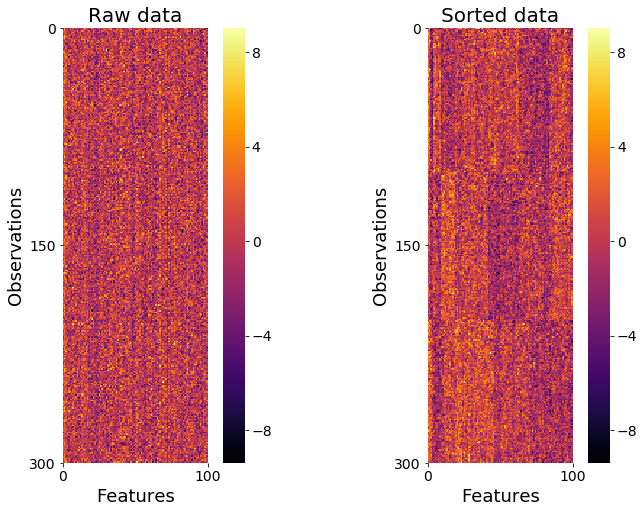

In [21]:
# Create three groups of points with feature means randomly distributed
# around 0, 20, 50
datas = []
for mu in [0, 20, 50]:
    mu = np.random.normal(0, 1, size=100)
    datas.append(np.random.normal(mu, 2, size=(100, 100)))
data = np.vstack(datas)

# Shuffle the data rows and columns
r_idx = np.random.choice(data.shape[0], replace=False, size=data.shape[0])
c_idx = np.random.choice(data.shape[1], replace=False, size=data.shape[1])

data = pd.DataFrame(data[r_idx][:, c_idx])

# Plot data
fig, axes = plt.subplots(1, 2, figsize=(12,8))

# Unclustered
ax = axes[0]
ax = sns.heatmap(data, cmap='inferno', xticklabels=np.arange(0,100), yticklabels=np.arange(0,300), ax=ax)

ax.set_title('Raw data', fontsize=20)
ax.set_xlabel('Features', fontsize=18)
ax.set_ylabel('Observations', fontsize=18)

ax.set_xticks([0, 100])
ax.set_yticks([0, 150, 300])

ax.set_xticklabels([0, 100], rotation=0)
ax.set_yticklabels([0, 150, 300])

ax.set_aspect(1)

# Clustered with average linkage clustering
ax = axes[1]
ind_row = hierarchy.leaves_list(hierarchy.linkage(data, method='average'))
ind_col = hierarchy.leaves_list(hierarchy.linkage(data.T, method='average'))
ax = sns.heatmap(data.iloc[ind_row, ind_col], cmap='inferno', xticklabels=np.arange(0,100), yticklabels=np.arange(0,300), ax=ax)

ax.set_title('Sorted data', fontsize=20)
ax.set_xlabel('Features', fontsize=18)
ax.set_ylabel('Observations', fontsize=18)

ax.set_xticks([0, 100])
ax.set_yticks([0, 150, 300])

ax.set_xticklabels([0, 100], rotation=0)
ax.set_yticklabels([0, 150, 300])

ax.set_aspect(1)

It's hard to draw any conclusions from this. How close together are any two observations? How do sets of features covary? After sorting the rows and columns of the matrix using average linkage clustering, we can see the three cluster structure of the data emerge, but we can't tell what shape the data is in. Are all of the clusters the same shape? Are they evently spaced in the feature space?

Here we are certainly looking at all of the data. We have taken a $300 \times 100$ matrix and displayed it in two dimensions. Yet, this representation of the data hinders hypothesis generation and leave many questions unanswered. We need a better solution.

### Can we reduce the dimensionality of the data?

Although the heatmap shows relationships between rows and between featues (albeit poorly), we're usually interested in understanding relationships between one axis of the data at a time. If we're considering handwritten digits, we might be interested in understanding if some kinds of digits are more similar to eachother than others. If the data represents movie ratings on Netflix we might think of asking "do there exist discrete classes of users or is it more of a continuum"? In the Netflix case, we might also ask the transposed question of movies. If the data we're visualizing is a graph, we might want to know if there exist cliques in the graph or if the graph is "long" or "round".

To an extent, all of these questions rely on 

![img](../img/ambient_latent_dim.png)


On the left, points are uniformly distributed in the ambient 3-dimensional space. On the right, the points are randomly distributed on a 1-dimensional line that rolls in on itself. If we could unroll this line on the right, we would only need one or two dimensions to visualize it.

#### How can we reduce dimensions?

There are many, many ways to visualize data. The most common ones are PCA, t-SNE, and MDS. Each of these has their own assumptions and simplifications they use to figure out an optimal 2D representation of high-dimensional data.

PCA identifies linear combinations of genes such that each combination (called a Principal Component) that explains the maximum variance. t-SNE is a convex optimization algorithm that tries to minimize the divergence between the neighborhood distances of points (the distance between points that are "close") in the low-dimensional representation and original data space.

There are thousands of dimensionality reduction algorithms out there, and it's important to understand that the drawbacks and benefits of each.

In [6]:
# %load /home/dan/.jupyter/firstcell.py
%load_ext autoreload
%autoreload 2

import sys
import os
import time

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

font = {'size'   : 14}
mpl.rc('font', **font)

import numpy as np
import pandas as pd

from scipy import stats
import sklearn

from sklearn.decomposition import PCA

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# Create three groups of points with feature means randomly distributed
# around 0, 20, 50
datas = []
for mu in [0, 20, 50]:
    mu = np.random.normal(0, 1, size=100)
    datas.append(np.random.normal(mu, 2, size=(100, 100)))
data = np.vstack(datas)

# Shuffle the data rows and columns
r_idx = np.random.choice(data.shape[0], replace=False, size=data.shape[0])
c_idx = np.random.choice(data.shape[1], replace=False, size=data.shape[1])

data = pd.DataFrame(data[r_idx][:, c_idx])

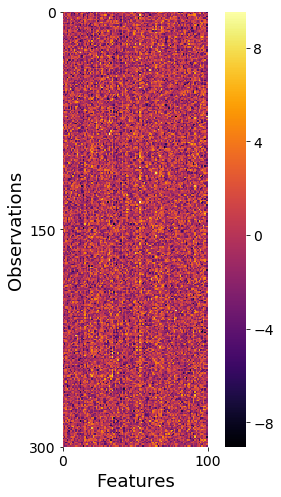

In [7]:
# Plot data
fig, ax = plt.subplots(1, figsize=(6,8))

ax = sns.heatmap(data, cmap='inferno', xticklabels=np.arange(0,100), yticklabels=np.arange(0,300), ax=ax)
ax.set_xlabel('Features', fontsize=18)
ax.set_ylabel('Observations', fontsize=18)

ax.set_xticks([0, 100])
ax.set_yticks([0, 150, 300])

ax.set_xticklabels([0, 100], rotation=0)
ax.set_yticklabels([0, 150, 300])

ax.set_aspect(1)

In [12]:
import scipy

In [13]:
from scipy.cluster import hierarchy

In [15]:
ind_row = hierarchy.leaves_list(hierarchy.linkage(data))
ind_col = hierarchy.leaves_list(hierarchy.linkage(data.T))

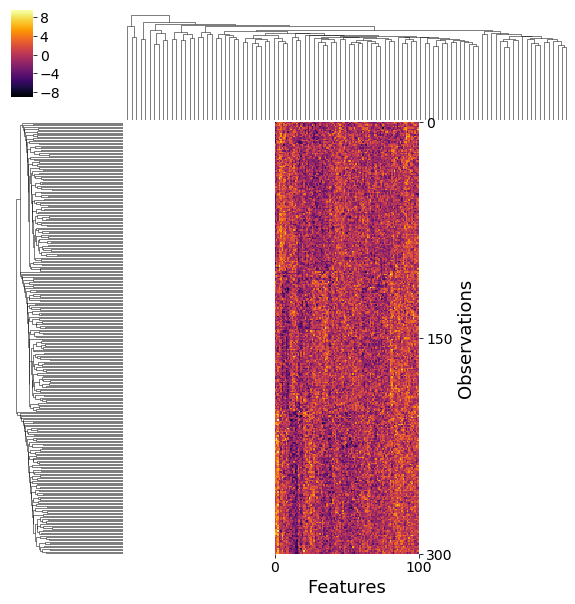

In [11]:
cg = sns.clustermap(data, cmap='inferno', xticklabels=np.arange(0,100), yticklabels=np.arange(0,300), figsize=())
cg.

ax = cg.ax_heatmap

cg.ax_row_dendrogram.set_visible(False)
cg.ax_row_dendrogram.set_visible(True)

ax.set_xlabel('Features', fontsize=18)
ax.set_ylabel('Observations', fontsize=18)

ax.set_xticks([0, 100])
ax.set_yticks([0, 150, 300])

ax.set_xticklabels([0, 100], rotation=0)
ax.set_yticklabels([0, 150, 300])

ax.set_aspect(1)

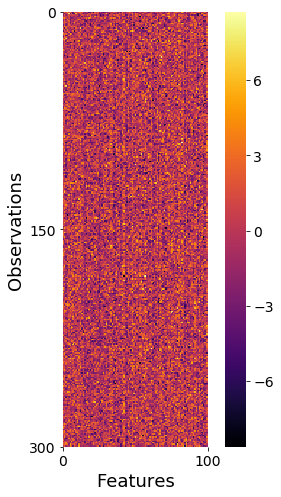

In [86]:
# Plot data
fig, ax = plt.subplots(1, figsize=(6,8))

ax = sns.heatmap(data, cmap='inferno', xticklabels=np.arange(0,100), yticklabels=np.arange(0,300), ax=ax)
ax.set_xlabel('Features', fontsize=18)
ax.set_ylabel('Observations', fontsize=18)

ax.set_xticks([0, 100])
ax.set_yticks([0, 150, 300])

ax.set_xticklabels([0, 100], rotation=0)
ax.set_yticklabels([0, 150, 300])

ax.set_aspect(1)

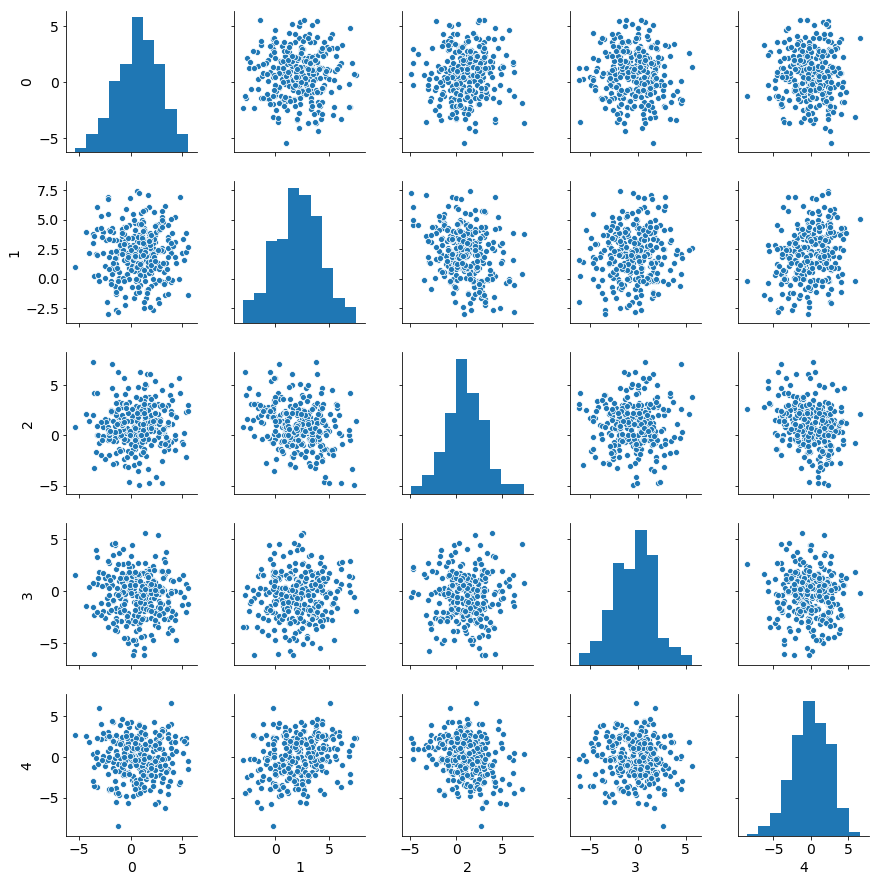

In [24]:
sns.pairplot(data.iloc[:,:5])

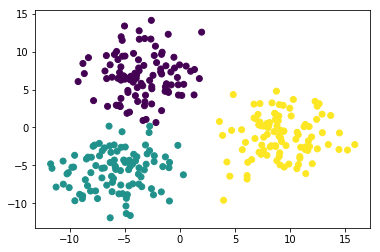

In [53]:
plt.scatter(data_pca[:,0], data_pca[:,1], c= cluster)

In [42]:
cluster = [i // 100 for i in range(300)]